# Set up

### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from dython import nominal
from matplotlib              import pyplot as plt
from IPython.display         import HTML

from sklearn.tree            import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model    import LogisticRegression
from sklearn.preprocessing   import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble        import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics         import make_scorer, accuracy_score
from sklearn.neighbors       import KNeighborsClassifier
from xgboost                 import XGBClassifier



### Functions

In [2]:
# verificando a performance da Regressão Logística
def MachineLearning(dataset):

    lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy', 'f1']

    nome_das_medidas = ['acurácia', 'sensibilidade', 'vpp', 'eficiência', 'f1-score']

    lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=300, max_depth = 3, max_features = 3),
                        RandomForestClassifier(n_estimators=300, max_depth = 3, max_features = 4),
                        RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 3),
                        RandomForestClassifier(n_estimators=300, max_depth = 6, max_features = 4)]

    nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        'Bagging',
                        'Random Forest (prof = 3, mf = 3)',
                        'Random Forest (prof = 3, mf = 4)',
                        'Random Forest (prof = 6, mf = 3)',
                        'Random Forest (prof = 6, mf = 4)']

    resultados0 = {}

    for i in range(len(lista_de_modelos)):
        print('Rodando modelo: ' + nome_dos_modelos[i])
        accs_vc = cross_validate(lista_de_modelos[i], x_train, y_train, cv = kf, scoring = lista_de_medidas)

        acc = accs_vc['test_accuracy'].mean()
        sen = accs_vc['test_recall'].mean()
        vpp = accs_vc['test_precision'].mean()
        bac = accs_vc['test_balanced_accuracy'].mean()
        f1s = accs_vc['test_f1'].mean()

        resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
    resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

    return resultados


def preprocessing_cv(df_data):  
    
    le = LabelEncoder()
    rs = RobustScaler()

    df_data['carrier_delay_in_minutes'] = rs.fit_transform(df_data[['carrier_delay_in_minutes']].values)
    df_data['delivery_delay_in_minutes'] = rs.fit_transform(df_data[['delivery_delay_in_minutes']].values)
    df_data['gender'] = le.fit_transform(df_data['gender'])
    df_data['customer_type'] = le.fit_transform(df_data['customer_type'])
    df_data['type_of_purchase'] = le.fit_transform(df_data['type_of_purchase'])
    df_data['store_size'] = le.fit_transform(df_data['store_size'])
    


    cleaned = df_data
    return cleaned

def data_clean(data):
    data = data[data['age'] >= 15]


    # Verificando numero de linhas sem NAN
    data_clean = data[~data['delivery_delay_in_minutes'].isna()]

    return data_clean

def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()


In [3]:
# def precision_at_k(data, k=2000):
#     # reset index
#     data = data.reset_index(drop = True)

#     # create ranking order
#     data['ranking'] = data.index + 1

#     data['precision_at_k'] = data['satisfaction'].cumsum() / data['ranking']

#     return data.loc[k, 'precision_at_k']



# def ndcg_score(y_true, y_pred, k=None):
#     # y_true: lista de relevâncias binárias (1 para relevante, 0 para não relevante)
#     # y_pred: lista de pontuações preditas pelo modelo
#     # k: número de elementos para considerar no cálculo do NDCG (se for None, usa o tamanho total)

#     if k is None:
#         k = len(y_true)

#     # Ordena as listas de relevâncias e predições pelo valor predito (do maior para o menor)
#     sorted_indices = np.argsort(y_pred)[::-1]
#     y_true_sorted = np.take(y_true, sorted_indices)[:k]

#     # Calcula o DCG (Discounted Cumulative Gain)
#     dcg = np.sum(y_true_sorted / np.log2(np.arange(2, k + 2)))

#     # Ordena as listas de relevâncias idealmente (todas relevâncias relevantes primeiro)
#     ideal_sorted_indices = np.argsort(y_true)[::-1]
#     ideal_sorted = np.take(y_true, ideal_sorted_indices)[:k]

#     # Calcula o IDCG (Ideal Discounted Cumulative Gain)
#     idcg = np.sum(ideal_sorted / np.log2(np.arange(2, k + 2)))

#     # Calcula o NDCG (Normalized Discounted Cumulative Gain)
#     ndcg_scorer = dcg / idcg if idcg > 0 else 0.0

#     return ndcg_scorer


    


In [4]:
jupyter_settings()

### Import Data

In [5]:
df_train_raw = pd.read_csv('data/train.csv', low_memory=False)
df_test_raw = pd.read_csv('data/test.csv', low_memory=False)

## ETL

### Data Raw status

In [6]:
df1 = df_train_raw.copy()
df1test = df_test_raw.copy()

#### Dados

In [7]:
df1.head(5)

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,Store location,Toilet cleaning,Dressing room,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Satisfied


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          103904 non-null  int64  
 1   Gender                      103904 non-null  object 
 2   Customer Type               103904 non-null  object 
 3   Age                         103904 non-null  int64  
 4   Type of Purchase            103904 non-null  object 
 5   Store size                  103904 non-null  object 
 6   Store distance              103904 non-null  int64  
 7   InStore wifi                103904 non-null  int64  
 8   Open/Close time convenient  103904 non-null  int64  
 9   Easy of online shopping     103904 non-null  int64  
 10  Store location              103904 non-null  int64  
 11  Toilet cleaning             103904 non-null  int64  
 12  Dressing room               103904 non-null  int64  
 13  Waiting room  

In [9]:
df1test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          25976 non-null  int64  
 1   Gender                      25976 non-null  object 
 2   Customer Type               25976 non-null  object 
 3   Age                         25976 non-null  int64  
 4   Type of Purchase            25976 non-null  object 
 5   Store size                  25976 non-null  object 
 6   Store distance              25976 non-null  int64  
 7   InStore wifi                25976 non-null  int64  
 8   Open/Close time convenient  25976 non-null  int64  
 9   Easy of online shopping     25976 non-null  int64  
 10  Store location              25976 non-null  int64  
 11  Toilet cleaning             25976 non-null  int64  
 12  Dressing room               25976 non-null  int64  
 13  Waiting room                259

### Changes

In [10]:
df1.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
       'Store size', 'Store distance', 'InStore wifi',
       'Open/Close time convenient', 'Easy of online shopping',
       'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
       'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
       'Purchase service', 'Store Service', 'Cleanliness',
       'Carrier delay in minutes', 'Delivery delay in minutes',
       'Satisfaction'],
      dtype='object')

In [11]:
old_columns_train = [ 'id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
       'Store size', 'Store distance', 'InStore wifi',
       'Open/Close time convenient', 'Easy of online shopping',
       'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
       'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
       'Purchase service', 'Store Service', 'Cleanliness',
       'Carrier delay in minutes', 'Delivery delay in minutes',
       'Satisfaction' ]


old_columns_train = pd.Series(old_columns_train).apply(lambda x: x.strip().replace(' ', '_').lower())

# Rename
df1.columns = old_columns_train
df1 = df1.rename(columns={'self-store':'self_store'})

df1.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self_store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

In [12]:
old_columns_test = [ 'id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
   'Store size', 'Store distance', 'InStore wifi',
   'Open/Close time convenient', 'Easy of online shopping',
   'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
   'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
   'Purchase service', 'Store Service', 'Cleanliness',
   'Carrier delay in minutes', 'Delivery delay in minutes' ]


old_columns_test = pd.Series(old_columns_test).apply(lambda x: x.strip().replace(' ', '_').lower())

# Rename
df1test.columns = old_columns_test
df1test = df1test.rename(columns={'self-store':'self_store'})



In [13]:
df1['satisfaction'] = df1['satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)

In [14]:
df2 = data_clean(df1)
df2test = data_clean(df1test)

# Descriptive Statistical

### Data Dimensions

In [15]:
print(f'Number of Rows {df1.shape[0]}')
print(f'Number of Columns {df1.shape[1]}')

Number of Rows 103904
Number of Columns 24


### Basics Statistics

In [16]:
df3 = df2.copy()

In [17]:
# Split Numerical/Categorical Atributes

num_attributes = df3.select_dtypes( include=['int64', 'float64', 'int32'])
cat_attributes = df3.select_dtypes( include=['object'])

In [18]:
# Cental Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame(num_attributes.apply( np.median )).T


# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( np.min )).T
d3 = pd.DataFrame(num_attributes.apply( np.max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T


# Concatenate
table_m = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index()
table_m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

table_m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,129880.0,129879.0,64958.138526,64938.5,37479.821859,0.000748,-1.198889
1,age,15.0,85.0,70.0,40.905058,41.0,13.927971,0.141273,-0.808620
2,store_distance,31.0,4983.0,4952.0,1203.935011,850.0,1008.353883,1.079561,0.173178
3,instore_wifi,0.0,5.0,5.0,2.739109,3.0,1.335310,0.031886,-0.859661
4,open/close_time_convenient,0.0,5.0,5.0,3.042272,3.0,1.526573,-0.318081,-1.047682
5,easy_of_online_shopping,0.0,5.0,5.0,2.767294,3.0,1.403490,-0.023782,-0.922561
6,store_location,0.0,5.0,5.0,2.978625,3.0,1.283887,-0.055763,-1.043336
7,toilet_cleaning,0.0,5.0,5.0,3.213191,3.0,1.327132,-0.158512,-1.142236
8,dressing_room,0.0,5.0,5.0,3.286585,4.0,1.343437,-0.485183,-0.668843
9,waiting_room,0.0,5.0,5.0,3.465391,4.0,1.310483,-0.511410,-0.881800


In [19]:
# Outra maneira de fazer a descrição: 
df3.select_dtypes(include=['int64','float64']).describe().T


,count,mean,std,min,25%,50%,75%,max
id,98386.0,64958.138526,37480.012334,1.0,32507.25,64938.5,97383.75,129880.0
age,98386.0,40.905058,13.928042,15.0,29.00,41.0,51.00,85.0
store_distance,98386.0,1203.935011,1008.359008,31.0,413.00,850.0,1757.00,4983.0
instore_wifi,98386.0,2.739109,1.335317,0.0,2.00,3.0,4.00,5.0
open/close_time_convenient,98386.0,3.042272,1.526581,0.0,2.00,3.0,4.00,5.0
easy_of_online_shopping,98386.0,2.767294,1.403497,0.0,2.00,3.0,4.00,5.0
store_location,98386.0,2.978625,1.283893,0.0,2.00,3.0,4.00,5.0
toilet_cleaning,98386.0,3.213191,1.327139,0.0,2.00,3.0,4.00,5.0
dressing_room,98386.0,3.286585,1.343444,0.0,2.00,4.0,4.00,5.0
waiting_room,98386.0,3.465391,1.310489,0.0,2.00,4.0,5.00,5.0


### Cat/Num analysis

In [20]:
# Quantos linhas > 0 temos em 'delivery_delay_in_minutes'

df3[df3['delivery_delay_in_minutes'] > 0].select_dtypes(include=['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
id,43071.0,65394.573704,37974.336358,1.0,32148.5,65402.0,99873.5,129879.0
age,43071.0,40.768754,13.919813,15.0,29.0,41.0,51.0,85.0
store_distance,43071.0,1195.424462,1001.781470,31.0,419.0,846.0,1744.0,4983.0
instore_wifi,43071.0,2.691625,1.299159,0.0,2.0,3.0,4.0,5.0
open/close_time_convenient,43071.0,3.036800,1.513891,0.0,2.0,3.0,4.0,5.0
easy_of_online_shopping,43071.0,2.751202,1.386474,0.0,2.0,3.0,4.0,5.0
store_location,43071.0,2.984328,1.280059,1.0,2.0,3.0,4.0,5.0
toilet_cleaning,43071.0,3.173481,1.331284,0.0,2.0,3.0,4.0,5.0
dressing_room,43071.0,3.227972,1.335540,0.0,2.0,3.0,4.0,5.0
waiting_room,43071.0,3.421815,1.313823,0.0,2.0,4.0,4.0,5.0


In [21]:
cat_attributes = df1.select_dtypes( include=['object']).sample(10)
cat_attributes

,gender,customer_type,type_of_purchase,store_size
88455,Female,Loyal Customer,Personal,Medium
40709,Female,Loyal Customer,Gift,Large
28182,Male,Loyal Customer,Gift,Large
98431,Male,Loyal Customer,Gift,Large
87894,Female,Loyal Customer,Personal,Medium
7071,Male,Loyal Customer,Gift,Large
101475,Female,Loyal Customer,Gift,Large
57203,Male,Loyal Customer,Personal,Medium
18601,Male,Loyal Customer,Personal,Large
56561,Male,Loyal Customer,Personal,Medium


In [22]:
df3 = df3[df3['age'] >= 15]

# Verificando numero de linhas sem NAN
df3 = df3[~df3['delivery_delay_in_minutes'].isna()]

In [23]:
# Volume de pessoas 'Satisfied'
len(df3[df3['satisfaction'] == 'Satisfied'])

0

### Univariate Analysis

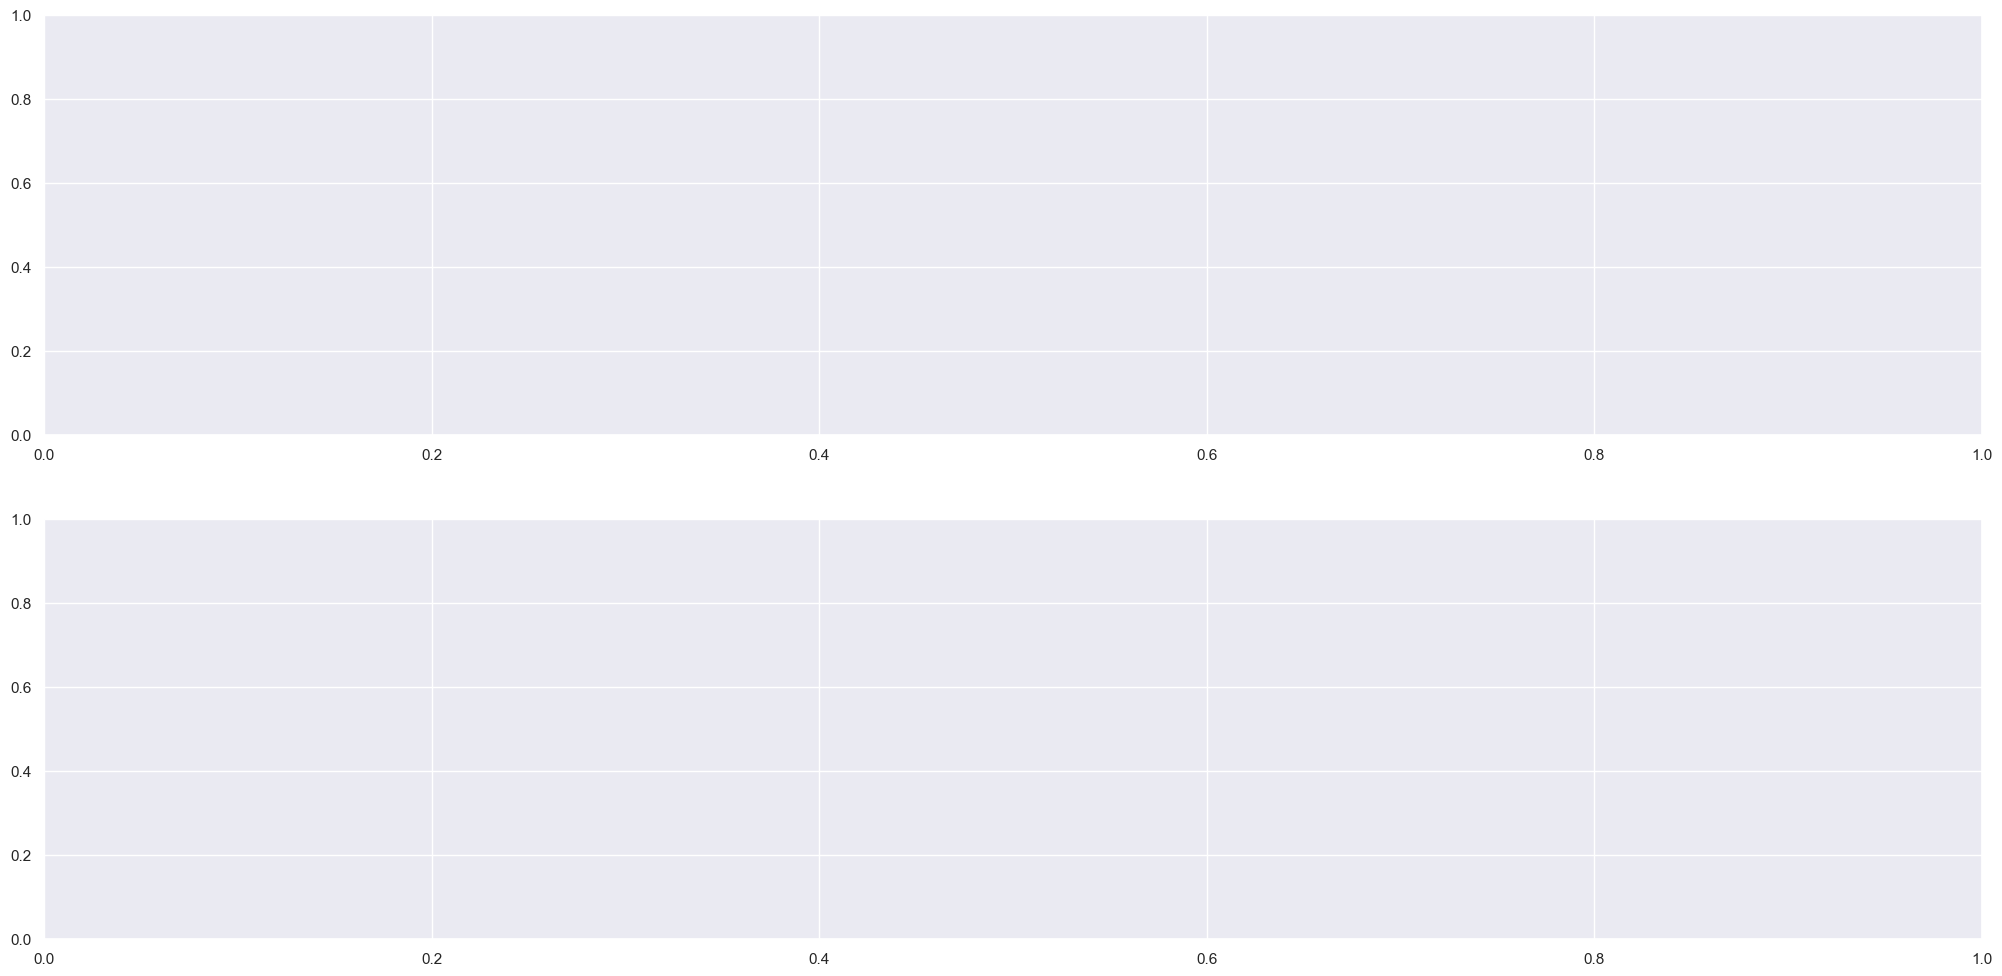

In [24]:
#Age analysis
plt.subplot(2,1,1)
sns.histplot(x='age',
             data=df3[df3['satisfaction'] == 'Satisfied'],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='age',
             data=df3[df3['satisfaction'] == 'Neutral or Dissatisfaction'],
             hue='satisfaction');

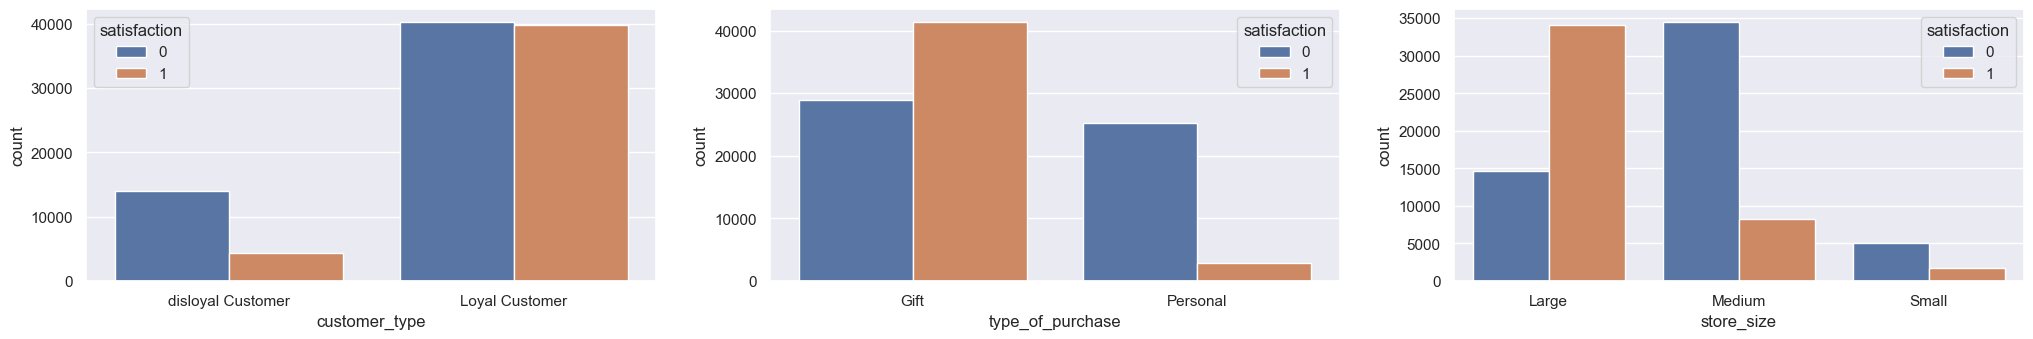

In [25]:
# Categorical analysis

plt.subplot(3,3,1)
sns.countplot(
    x='customer_type',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,2)
sns.countplot(
    x='type_of_purchase',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,3)
sns.countplot(
     x='store_size',
    hue=('satisfaction'),
    data=df3,
);



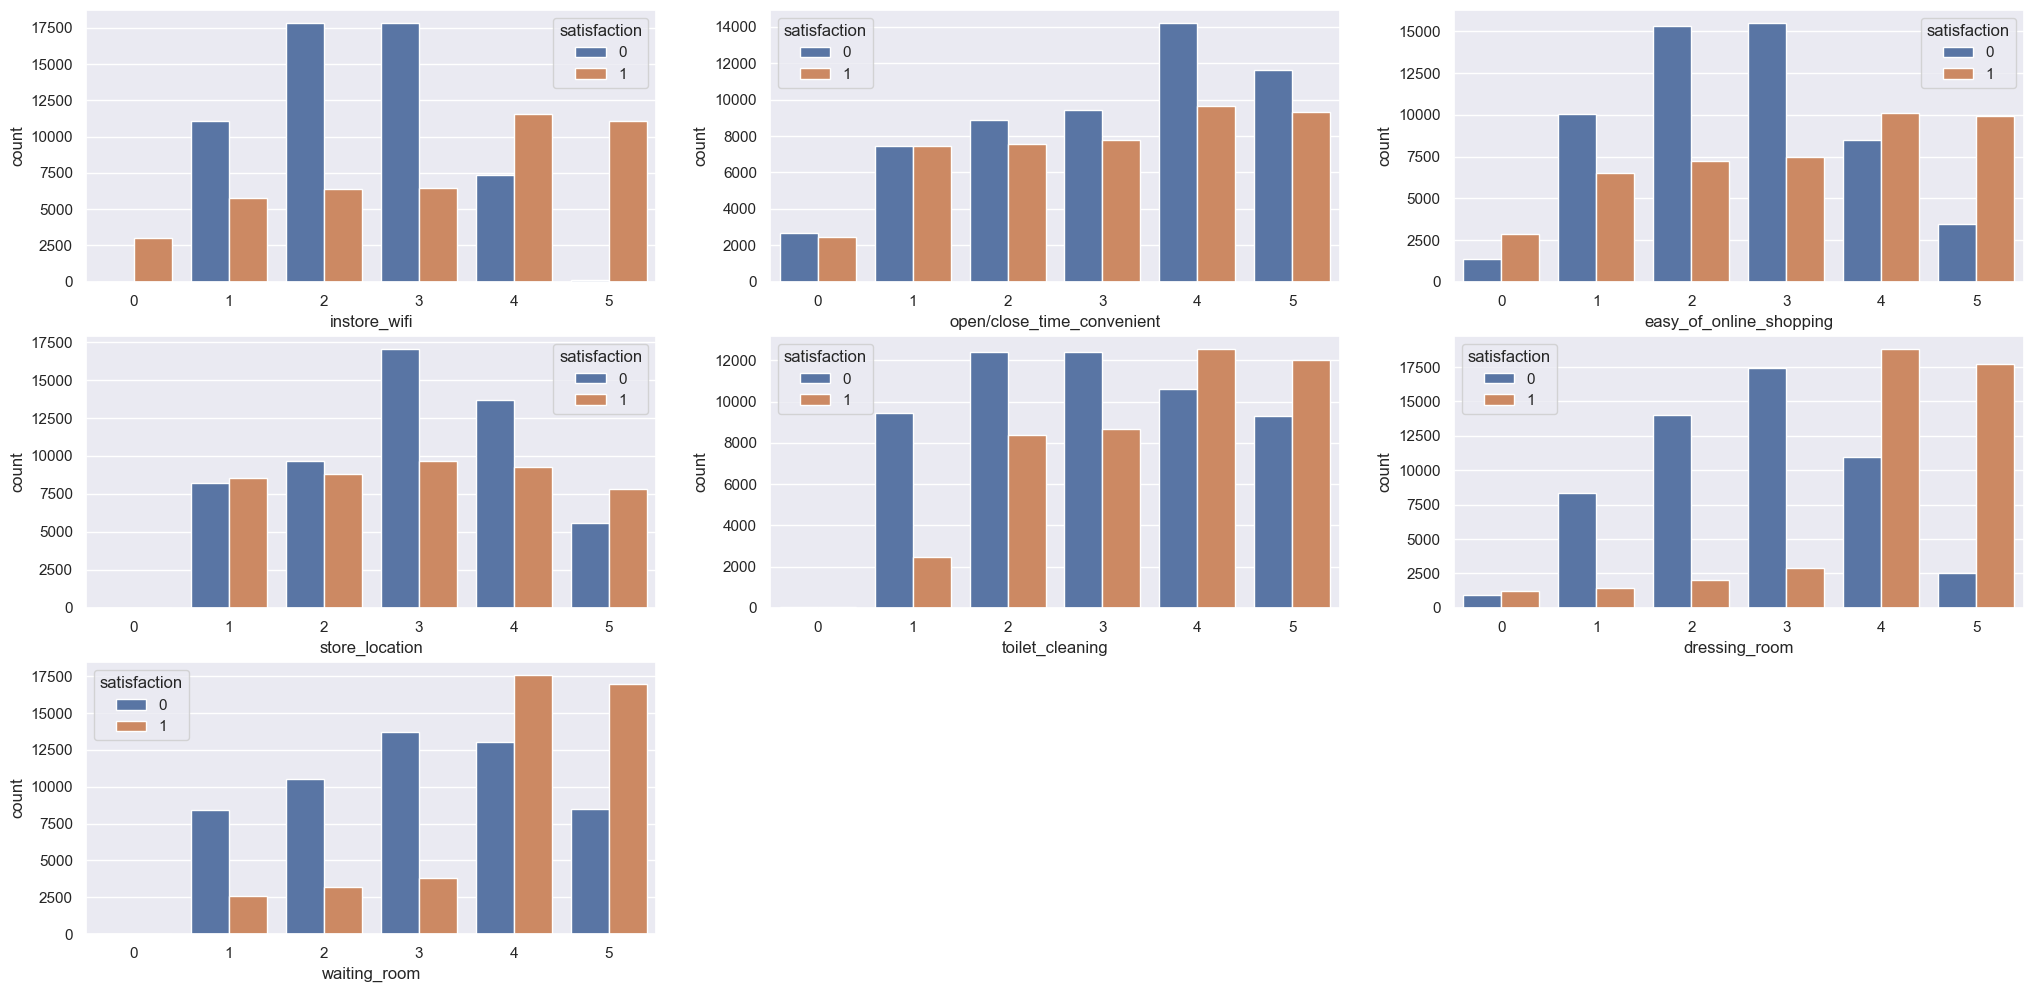

In [26]:
# Ranked analysis

plt.subplot(3,3,1)
sns.countplot(
    x='instore_wifi',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,2)
sns.countplot(
    x='open/close_time_convenient',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,3)
sns.countplot(
     x='easy_of_online_shopping',
    hue=('satisfaction'),
    data=df3,
);



plt.subplot(3,3,4)
sns.countplot(
     x='store_location',
    hue=('satisfaction'),
    data=df3,
);



plt.subplot(3,3,5)
sns.countplot(
     x='toilet_cleaning',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,6)
sns.countplot(
     x='dressing_room',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,7)
sns.countplot(
     x='waiting_room',
    hue=('satisfaction'),
    data=df3,
);



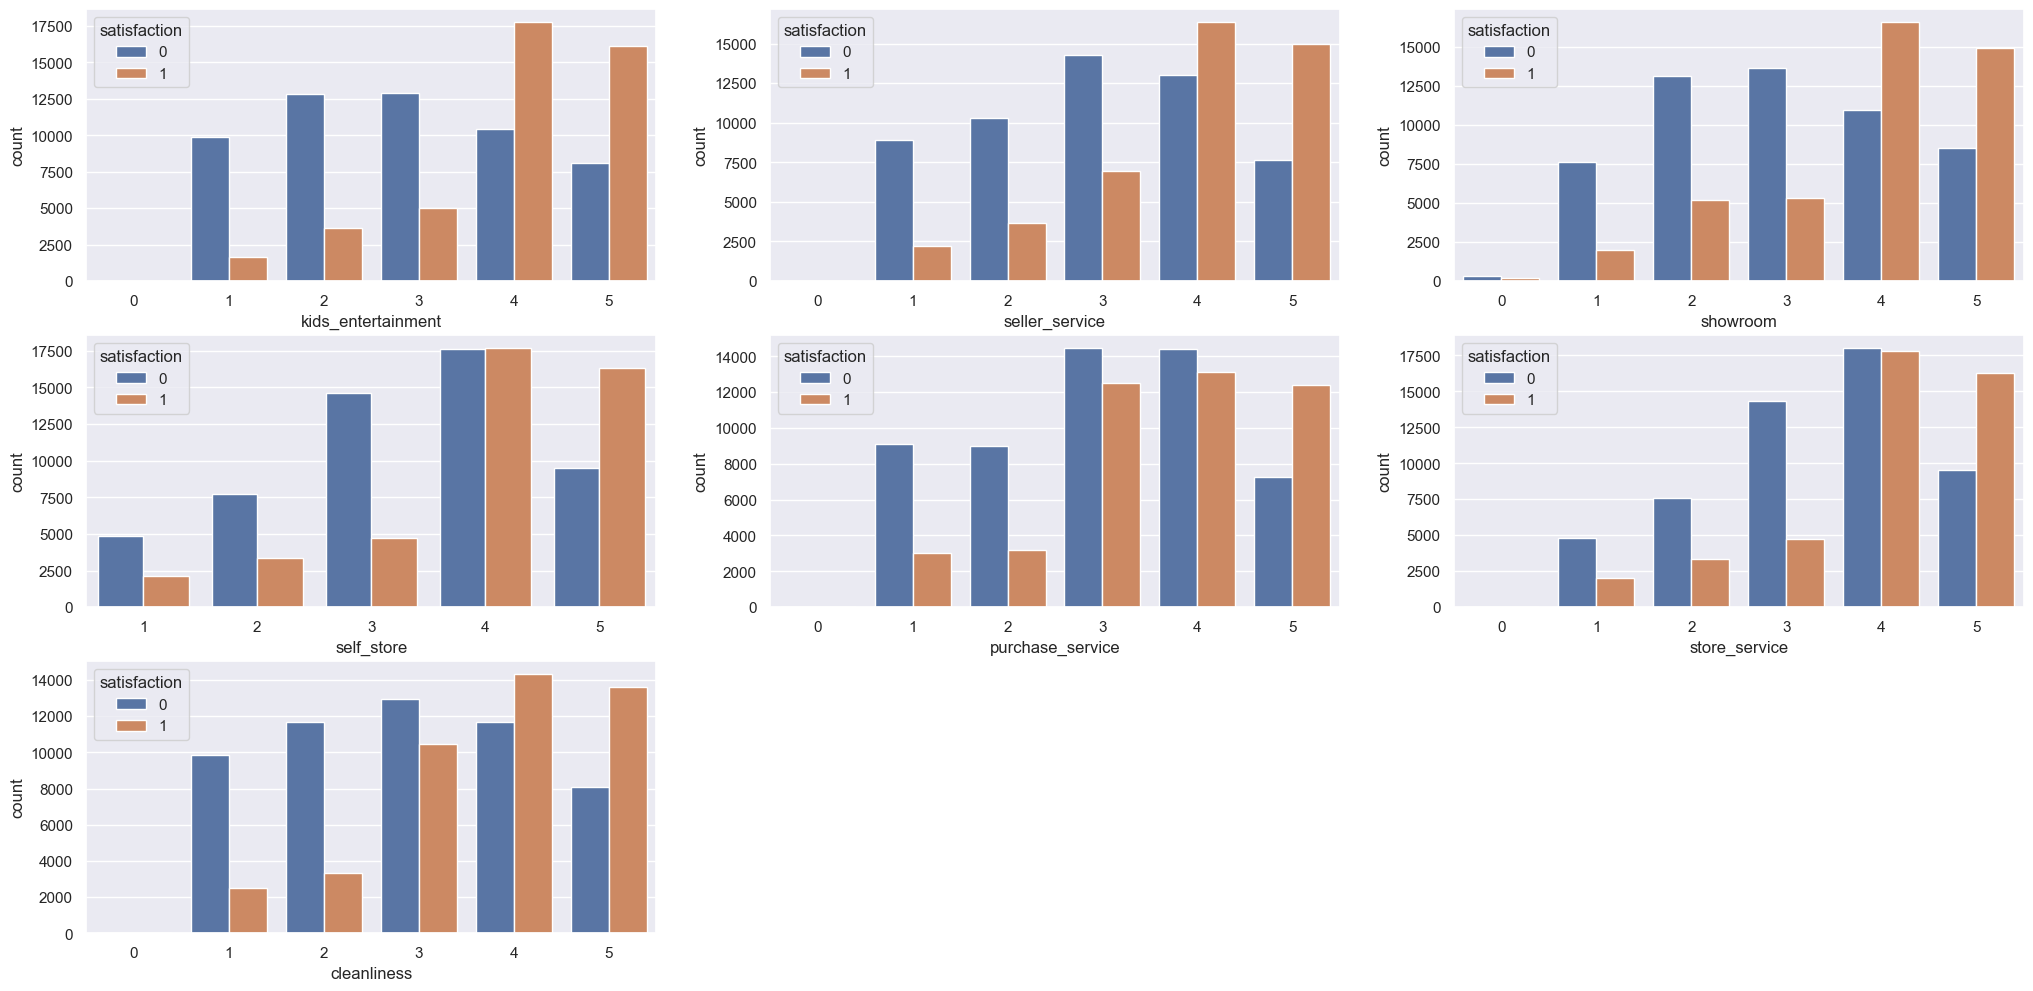

In [27]:
# Ranked analysis

plt.subplot(3,3,1)
sns.countplot(
     x='kids_entertainment',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,2)
sns.countplot(
     x='seller_service',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,3)
sns.countplot(
     x='showroom',
    hue=('satisfaction'),
    data=df3,
);



plt.subplot(3,3,4)
sns.countplot(
     x='self_store',
    hue=('satisfaction'),
    data=df3,
);


plt.subplot(3,3,5)
sns.countplot(
     x='purchase_service',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,6)
sns.countplot(
     x='store_service',
    hue=('satisfaction'),
    data=df3,
);

plt.subplot(3,3,7)
sns.countplot(
     x='cleanliness',
    hue=('satisfaction'),
    data=df3,
);

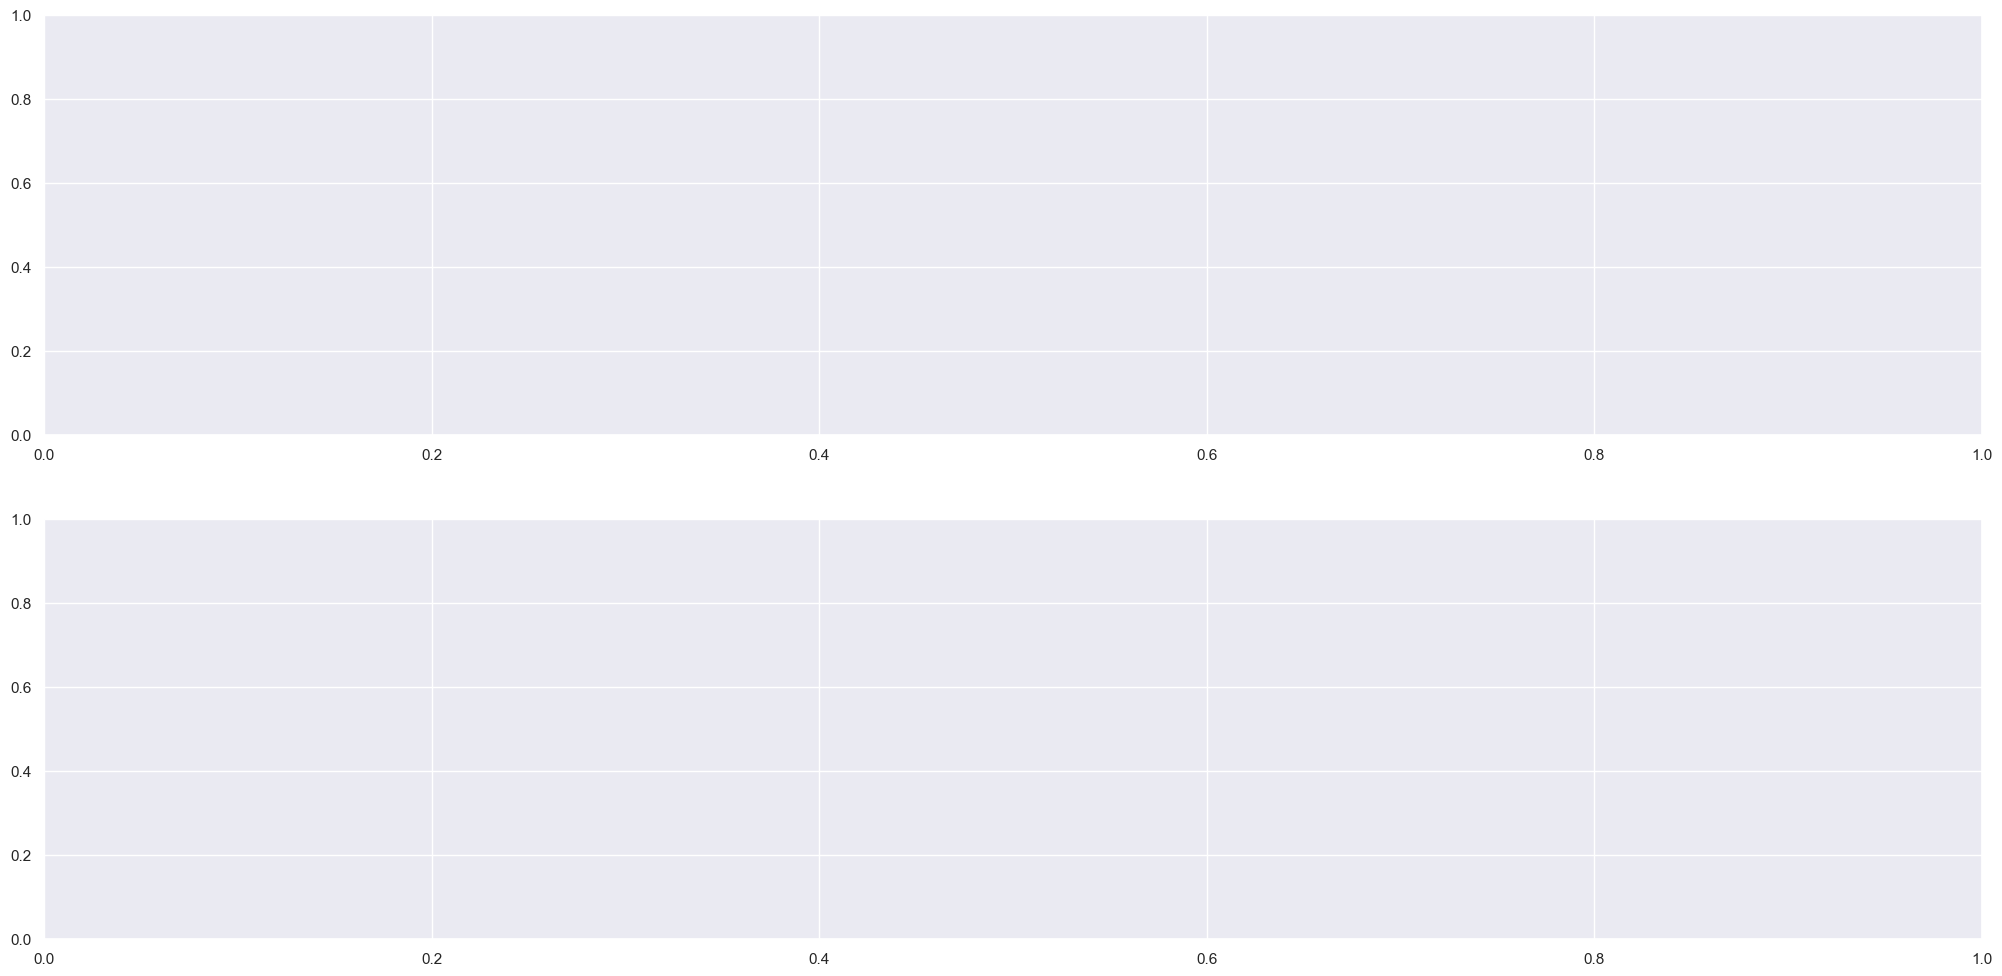

In [28]:
# 'carrier_delay_in_minutes' com tempo menor que 50 min
plt.subplot(2,1,1)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Satisfied') & (df3['carrier_delay_in_minutes'] < 50)],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction') & (df3['carrier_delay_in_minutes'] < 50)],
             hue='satisfaction');

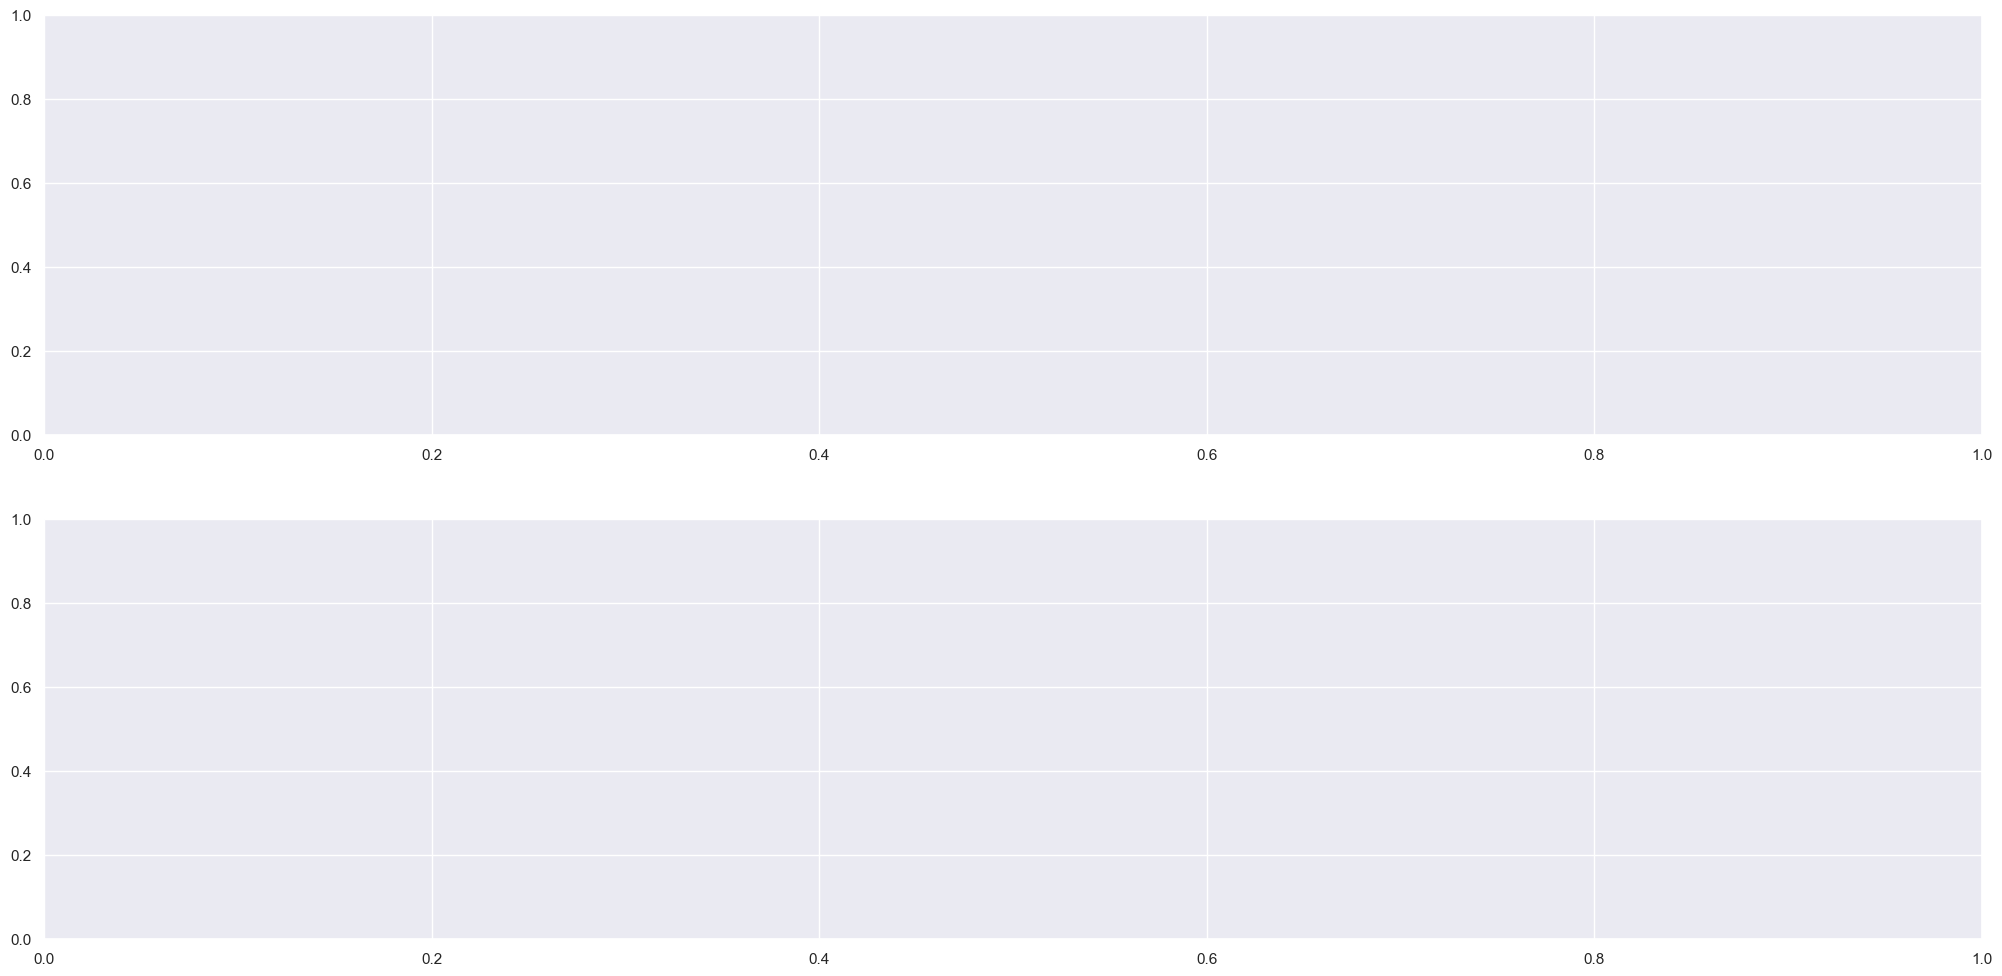

In [29]:
# 'carrier_delay_in_minutes' com tempo maior que 0 e menor que 200 min 

plt.subplot(2,1,1)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Satisfied') & (df3['carrier_delay_in_minutes'] > 0) & (df3['carrier_delay_in_minutes'] < 200)],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='carrier_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction') & (df3['carrier_delay_in_minutes'] > 0) & (df3['carrier_delay_in_minutes'] < 200)],
             hue='satisfaction');

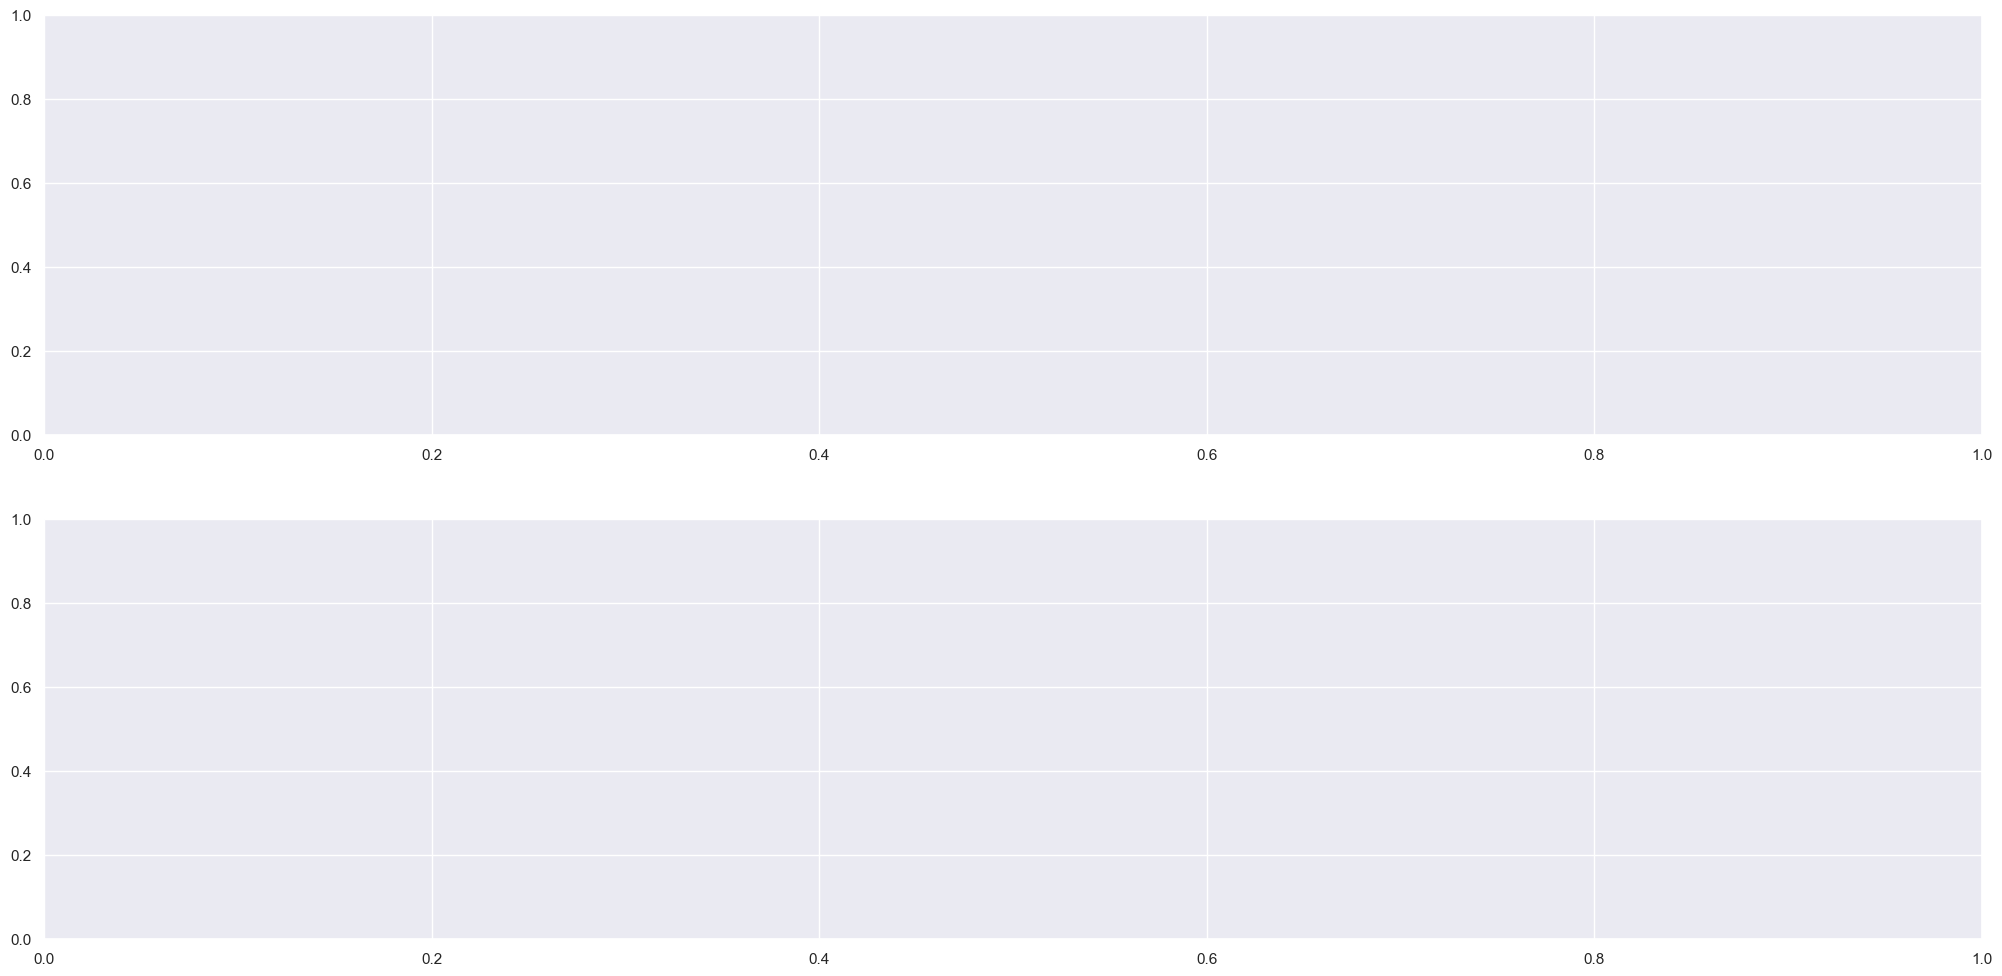

In [30]:
# 'delivery_delay_in_minutes' com tempo maior que 0 e menor que 200 min 
plt.subplot(2,1,1)
sns.histplot(x='delivery_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Satisfied') & (df3['delivery_delay_in_minutes'] > 0) & (df3['delivery_delay_in_minutes'] < 200)],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='delivery_delay_in_minutes',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction') & (df3['delivery_delay_in_minutes'] > 0) & (df3['delivery_delay_in_minutes'] < 200)],
             hue='satisfaction');

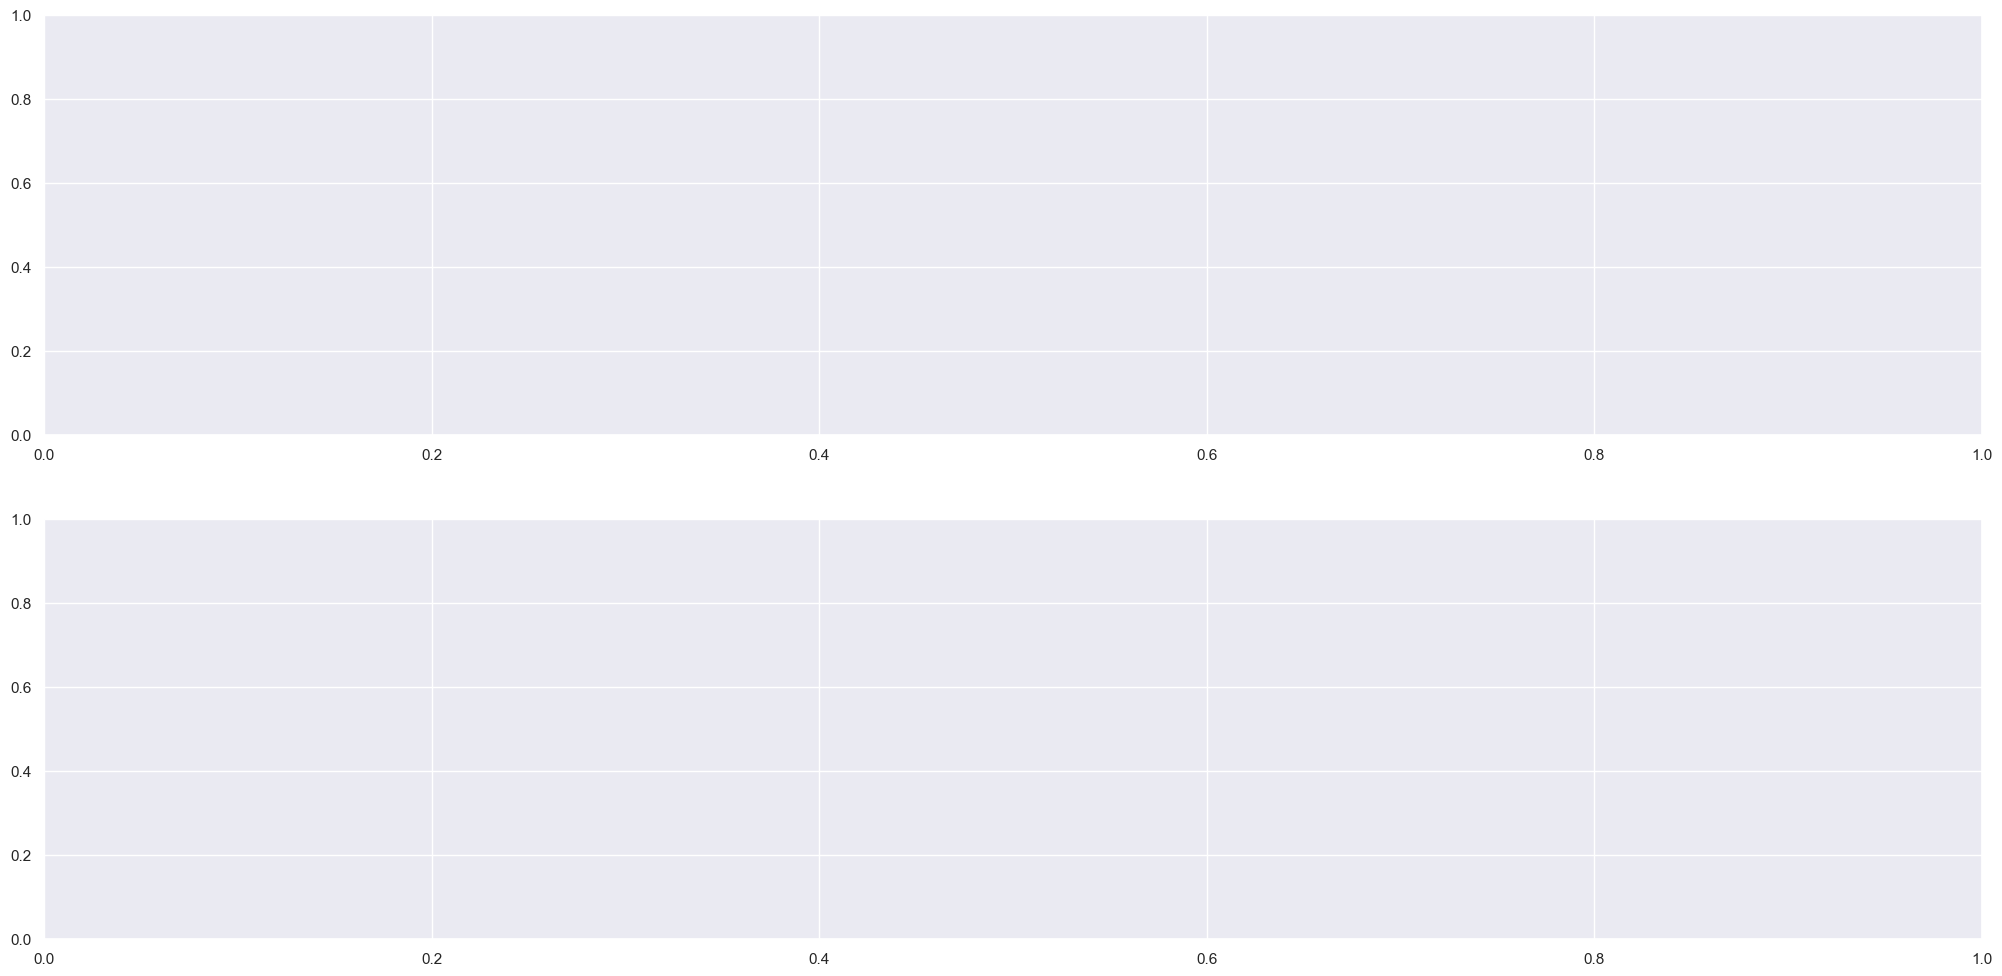

In [31]:
# Satisfação em relação à distância da loja 

plt.subplot(2,1,1)
sns.histplot(x='store_distance',
             data=df3[(df3['satisfaction'] == 'Satisfied')],
             hue='satisfaction');

plt.subplot(2,1,2)
sns.histplot(x='store_distance',
             data=df3[(df3['satisfaction'] == 'Neutral or Dissatisfaction')],
             hue='satisfaction');

In [32]:
df3.head(3)

,id,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0


In [33]:
# nominal.associations(df3.drop('id',axis = 1));

# Data Preparation

In [34]:
df4 = df3.copy()
# Test = df2test 

### Tranformations

In [35]:
df4 = preprocessing_cv(df4)
df2test = preprocessing_cv(df2test)

In [36]:
x_train = df4.drop(['id','satisfaction'], axis=1)
y_train = df4['satisfaction']

df_train = pd.concat([x_train, y_train], axis=1) # juntar as variaveis preditoras com a variavel alvo

### Features selection

In [37]:
df_train.head(2)

,gender,customer_type,age,type_of_purchase,store_size,store_distance,instore_wifi,open/close_time_convenient,easy_of_online_shopping,store_location,toilet_cleaning,dressing_room,waiting_room,kids_entertainment,seller_service,showroom,self_store,purchase_service,store_service,cleanliness,carrier_delay_in_minutes,delivery_delay_in_minutes,satisfaction
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0.083333,0.461538,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.000000,0.000000,1


In [38]:
# model definition
forest = en.ExtraTreesClassifier(n_estimators=250, random_state=0, n_jobs=-1)

# data preparation
x_train_n = df_train.drop(['satisfaction'], axis=1)
y_train_n = y_train.values

forest.fit(x_train_n, y_train_n)


ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature ranking
                      feature  importance
0               dressing_room    0.130586
0            type_of_purchase    0.130320
0                instore_wifi    0.130074
0                  store_size    0.082281
0               customer_type    0.060394
0          kids_entertainment    0.058140
0                waiting_room    0.045889
0     easy_of_online_shopping    0.040911
0              seller_service    0.037643
0                    showroom    0.037303
0                  self_store    0.032181
0            purchase_service    0.031132
0                 cleanliness    0.030730
0               store_service    0.026750
0              store_distance    0.024777
0                         age    0.021260
0  open/close_time_convenient    0.018509
0              store_location    0.018224
0             toilet_cleaning    0.014067
0   delivery_delay_in_minutes    0.011145
0    carrier_delay_in_minutes    0.010732
0                      gender    0.006953


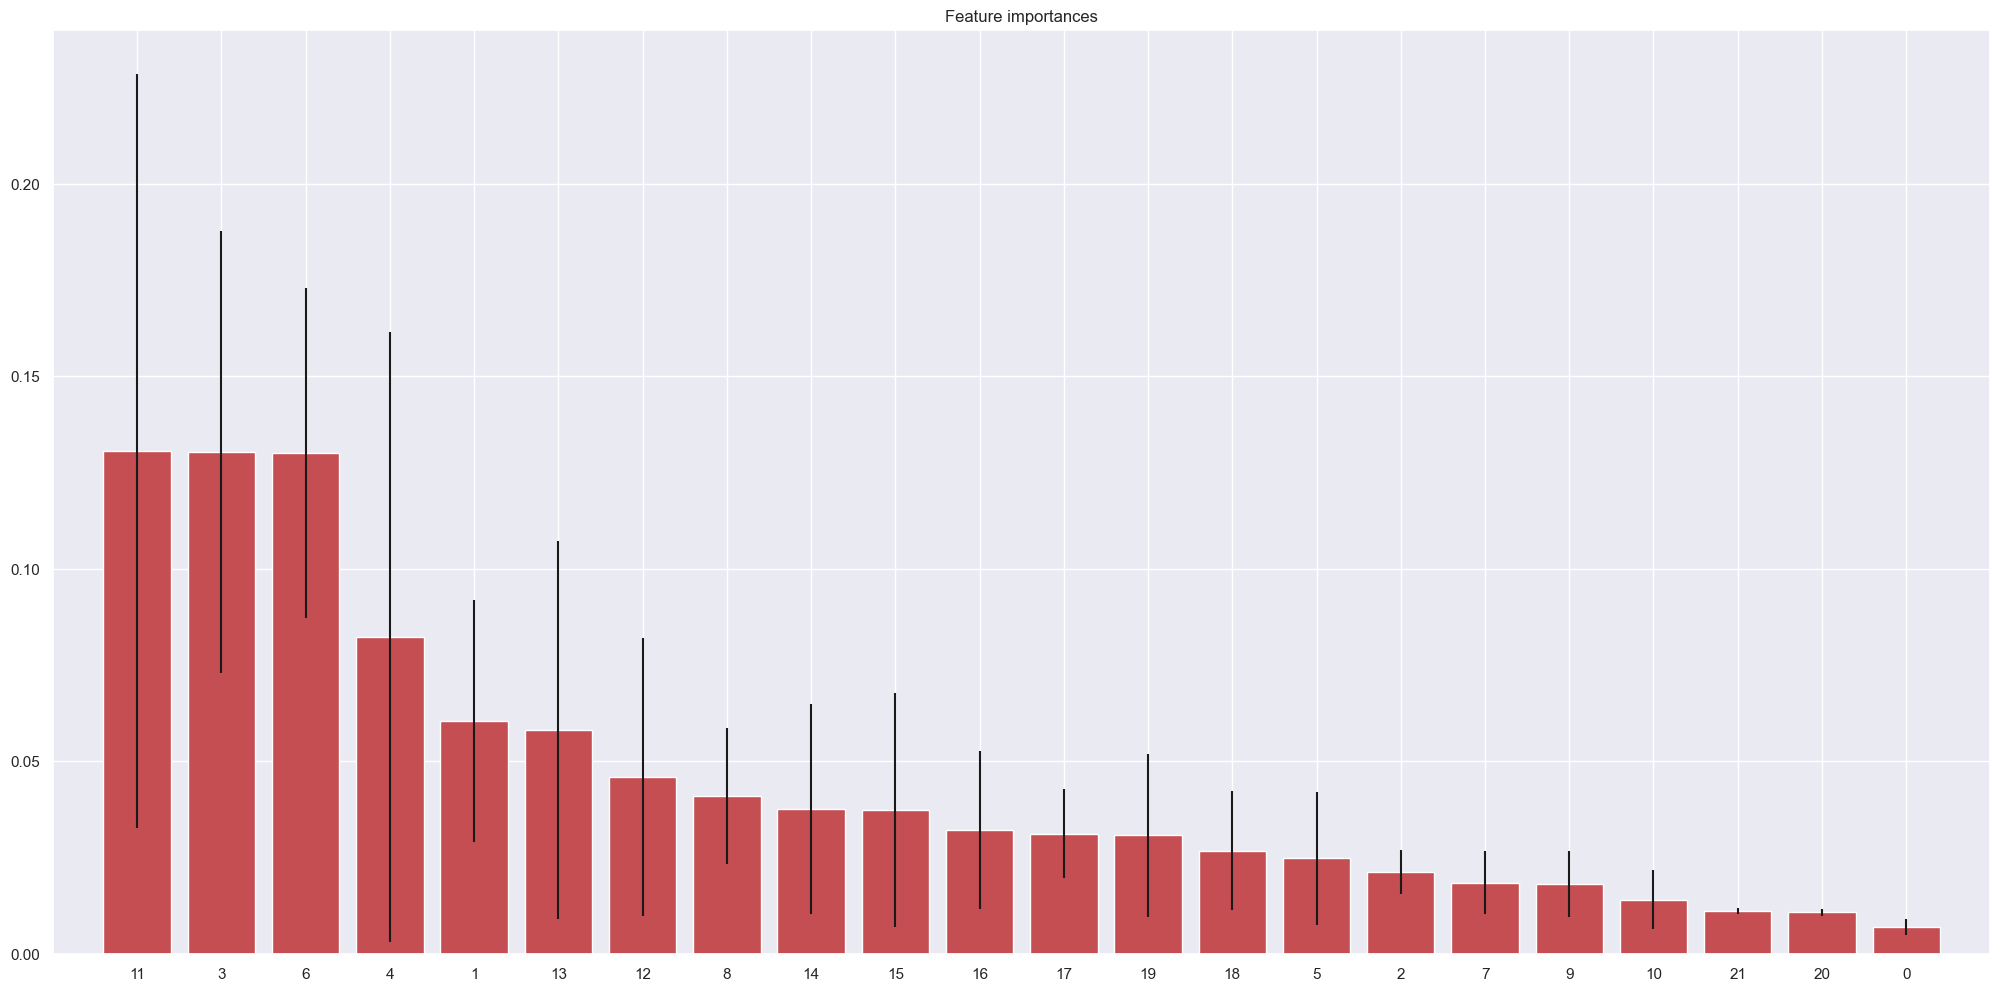

In [39]:
importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

# print the feature ranking

print('Feature ranking')

df = pd.DataFrame()

for i, j in zip(x_train_n, forest.feature_importances_):
    
    aux = pd.DataFrame({'feature': i, 'importance': j}, index=[0])
    
    df = pd.concat([df, aux], axis=0)
    
print(df.sort_values('importance', ascending=False))

# # plot the impurity-based feature importances of the forest
# plt.figure()
# plt.title('Feature importances')
# plt.bar(range(x_train_n.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
# plt.xticks(range(x_train_n.shape[1]), indices)
# plt.xlim([-1, x_train_n.shape[1]])
# plt.show()

# Machine Learning

In [42]:
cols_selected = ['type_of_purchase', 'instore_wifi', 'dressing_room', 'store_size', 'customer_type', 
                 'waiting_room', 'kids_entertainment','easy_of_online_shopping', 'showroom', 'seller_service', 'cleanliness', 'self_store' ]# ExtraTreesClassifier / LGB


x_train = df_train[cols_selected]
test = df2test[cols_selected]


In [43]:
# Validação cruzada Leave One Out
kf = StratifiedKFold(n_splits = 10)

In [44]:
# Verificando a performance da Regressão Logística

lista_de_medidas = ['precision']

modelo = LogisticRegression()
accs_vc = cross_validate(modelo, x_train, y_train, cv = kf, scoring = lista_de_medidas)

In [45]:
x_train.head(1)

,type_of_purchase,instore_wifi,dressing_room,store_size,customer_type,waiting_room,kids_entertainment,easy_of_online_shopping,showroom,seller_service,cleanliness,self_store
1,0,3,3,0,1,1,1,3,5,1,1,3


In [46]:
print(accs_vc['test_precision'].mean())

0.8638786241502242


In [47]:
MachineLearning(df_train)


Rodando modelo: Regressão Logística
Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: 5-NN
Rodando modelo: 15-NN
Rodando modelo: 25-NN
Rodando modelo: Bagging


# Kaggle

In [ ]:
# modelo Bagging
def Submissao(treino, teste, modelo, nome = 'submissaoKaggle'):

    x_train = treino.drop('satisfaction', axis = 1)
    y_train = treino['satisfaction']
 
    modelo.fit(x_train, y_train)
    pred = modelo.predict(teste)

    url = '../data/test.csv' 
    subm = pd.read_csv(url, usecols = ['id'])  
    subm['satisfaction'] = pred
    
    subm.to_csv(nome + '.csv', index = False)

In [ ]:
x_train.head(2)

,type_of_purchase,instore_wifi,dressing_room,store_size,customer_type,waiting_room,kids_entertainment,easy_of_online_shopping,showroom,seller_service,cleanliness,self_store
1,0,3,3,0,1,1,1,3,5,1,1,3
2,0,2,5,0,0,5,5,2,3,4,5,4


In [ ]:
test.head(2)

,type_of_purchase,instore_wifi,dressing_room,store_size,customer_type,waiting_room,kids_entertainment,easy_of_online_shopping,showroom,seller_service,cleanliness,self_store
0,0,5,4,1,0,3,5,3,5,5,5,5
1,0,1,4,0,0,5,4,3,4,4,5,4


In [ ]:
bg = BaggingClassifier()

Submissao(df_train, test, modelo = bg, nome = 'SubmissaoBG-setup1')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- age
- carrier_delay_in_minutes
- delivery_delay_in_minutes
- gender
- open/close_time_convenient
- ...
